# Seaborn: clustermap

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from ipywidgets import interactive

import warnings
warnings.filterwarnings("ignore")

## Basics - Toy Example

In [2]:
toy_data_dict = {
    'Name': ['Andy', 'Ben', 'Claire', 'David'],
    'Hours_Studied': [10, 20, 12, 28],
    'Score': [15, 20, 16, 25],
    'Street_Address': [11, 24, 18, 9]
}

In [3]:
toy_data = pd.DataFrame(toy_data_dict)
toy_data.set_index('Name', inplace=True)

toy_data

,Hours_Studied,Score,Street_Address
Name,,,
Andy,10,15,11
Ben,20,20,24
Claire,12,16,18
David,28,25,9


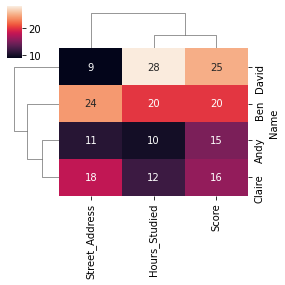

In [4]:
sns.clustermap(toy_data, figsize=(4, 4), annot=True);

## Basics - Penguins Dataset

#### Load the data

In [5]:
penguins = sns.load_dataset('penguins').dropna()

In [6]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [7]:
penguins.shape

(333, 7)

#### Build clustermap

In [8]:
numerical_cols = penguins.columns[2:6]

numerical_cols

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

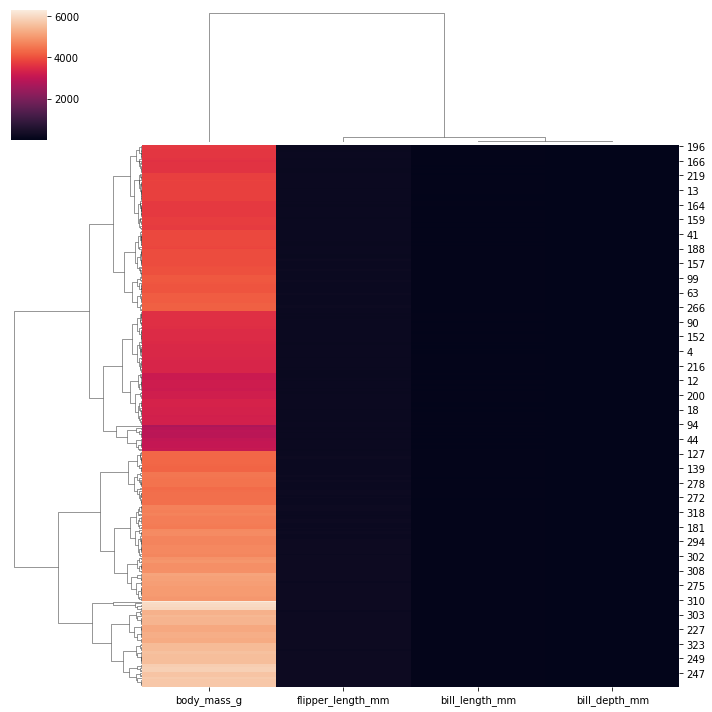

In [9]:
sns.clustermap(penguins[numerical_cols]);

#### `standard_scale`

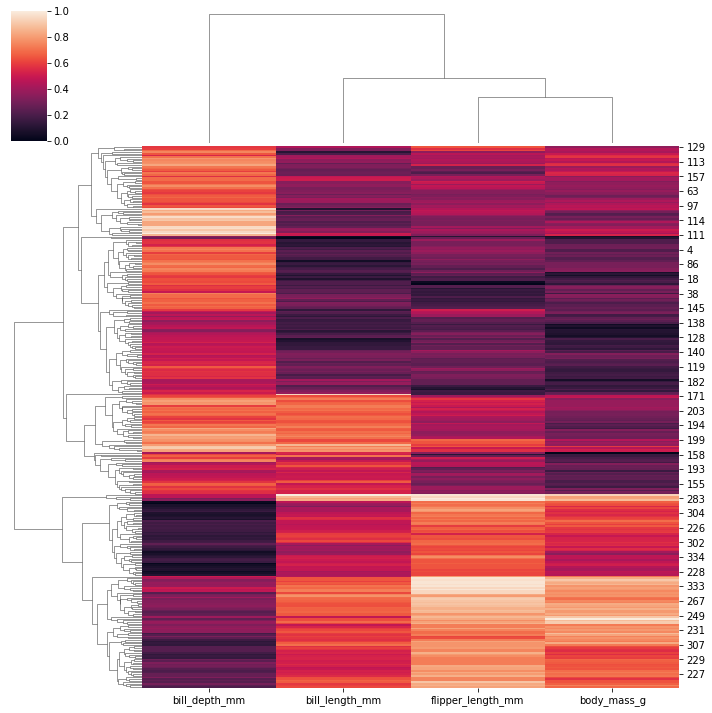

In [10]:
sns.clustermap(penguins[numerical_cols], standard_scale=1);

## Linkage and Metric

#### `method` = Linkage

Check out the `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) to learn more about available linkage options.

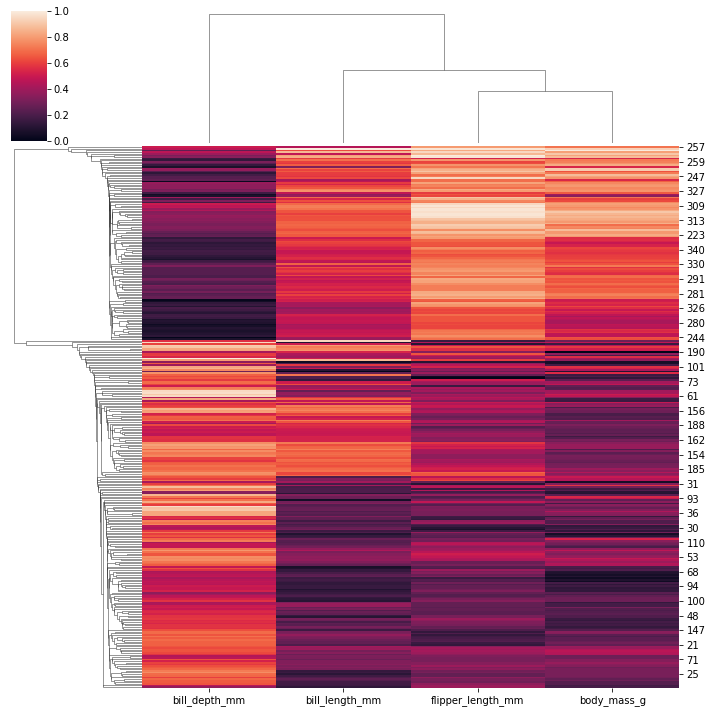

In [11]:
sns.clustermap(penguins[numerical_cols], standard_scale=1, method='single');

#### `metric`

See `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist) to learn about other available metrics.

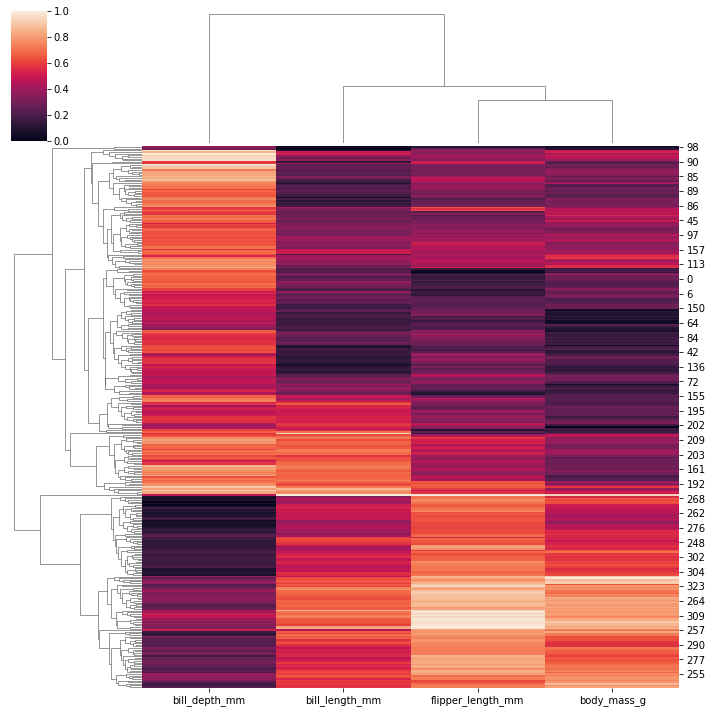

In [12]:
sns.clustermap(penguins[numerical_cols], standard_scale=1, metric='cityblock');

## Additional Options

### `row_colors`

In [13]:
species_colors=penguins.species.map({
    'Adelie': 'blue',
    'Chinstrap': 'red',
    'Gentoo': 'green'
})

In [14]:
len(species_colors)

333

In [15]:
species_colors[:5]

0    blue
1    blue
2    blue
4    blue
5    blue
Name: species, dtype: object

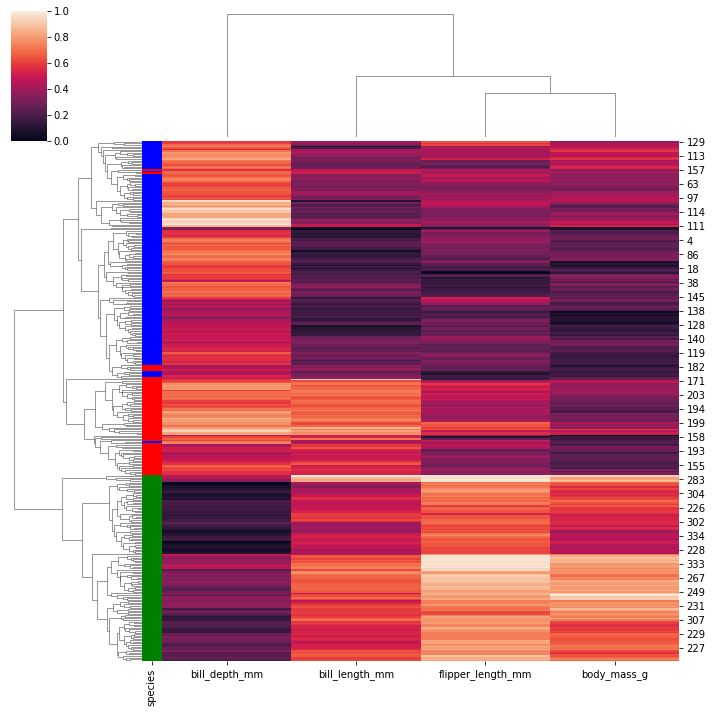

In [16]:
sns.clustermap(penguins[numerical_cols], standard_scale=1, row_colors=species_colors);

## BONUS: Styling

#### `cmap` and `vmin`

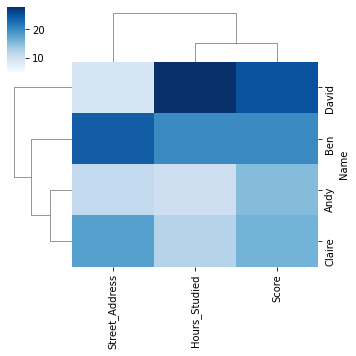

In [17]:
sns.clustermap(toy_data, figsize=(5, 5), cmap='Blues', vmin=5);

#### `row_cluster` and `cbar_pos`

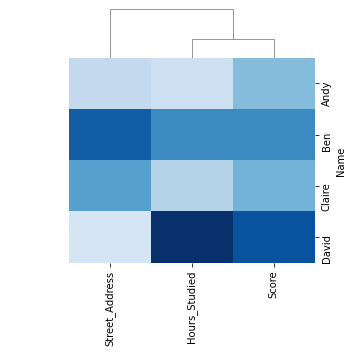

In [18]:
sns.clustermap(toy_data, figsize=(5, 5), cmap='Blues', vmin=5,
               row_cluster=False,
               cbar_pos=None #(0,.4,.05,.35)
              );

#### Annotations with `annot` and `fmt`

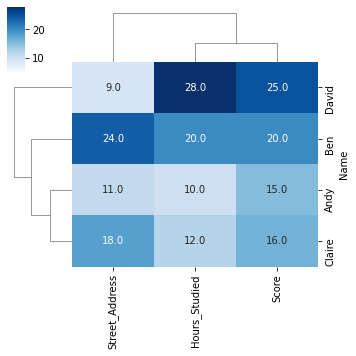

In [19]:
sns.clustermap(toy_data, figsize=(5, 5), cmap='Blues', vmin=5, annot=True, fmt='.1f');

## Overlays and Thumbnail

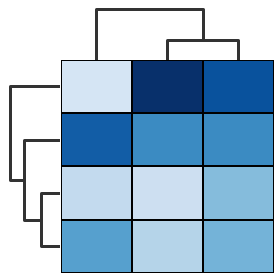

In [20]:
sns.clustermap(toy_data.reset_index().drop('Name', axis=1), 
               figsize=(4, 4), xticklabels=[], 
               yticklabels=[],
               cbar_pos=None,
               cmap='Blues',
               lw=2,
               linecolor='black',
               vmin=5,
               tree_kws={'lw': 3}
              );
#plt.savefig('22clustermap_image_whatIs.png', dpi=200)

### Thumbnail

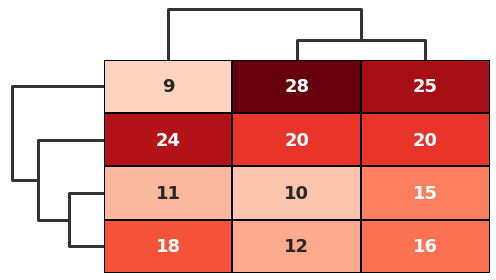

In [21]:
sns.clustermap(toy_data.reset_index().drop('Name', axis=1),
               figsize=(7,4), 
               xticklabels=[],
               yticklabels=[],
               cbar_pos=None,
               cmap='Reds',
               vmin=5,
               tree_kws={'lw': 3},
               lw=2,
               linecolor='black',
               annot=True,
               annot_kws={'fontsize': 18, 'fontweight': 'bold'}
              );
#plt.savefig('22clustermap_image_thumbnail.png', dpi=200)